## Library imports

In [88]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import matthews_corrcoef, roc_auc_score


In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [7]:
# separate features into numeric and categorical
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [x for x in data.select_dtypes(exclude=[np.number]).columns.tolist() if x!='NObeyesdad']
target_variable = 'NObeyesdad'
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Target variable:", target_variable)


# subsets for convenience
data_numeric = data[numeric_features].copy()
data_categorical = data[categorical_features].copy()

print("\nNumeric shape:", data_numeric.shape)
print("Categorical shape:", data_categorical.shape)

# numeric columns with few unique values (potentially categorical)
potential_categorical_numeric = [c for c in numeric_features if data[c].nunique() <30]
print("\nNumeric cols with <10 unique values (consider reviewing):", potential_categorical_numeric)

Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Target variable: NObeyesdad

Numeric shape: (2111, 8)
Categorical shape: (2111, 8)

Numeric cols with <10 unique values (consider reviewing): []


<Axes: xlabel='NObeyesdad'>

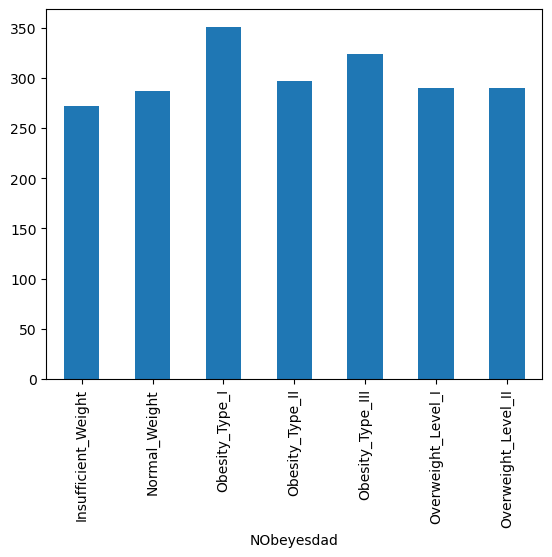

In [8]:
data.groupby('NObeyesdad').size().plot(kind='bar')

In [9]:
data.groupby('NObeyesdad').size().head(10)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64

The classes are not imbalanced!

In [10]:
# FCVC
data.groupby('FCVC').size().head(10)


FCVC
1.000000    33
1.003566     1
1.005578     1
1.008760     1
1.031149     1
1.036159     1
1.036414     1
1.052699     1
1.053534     1
1.063449     1
dtype: int64

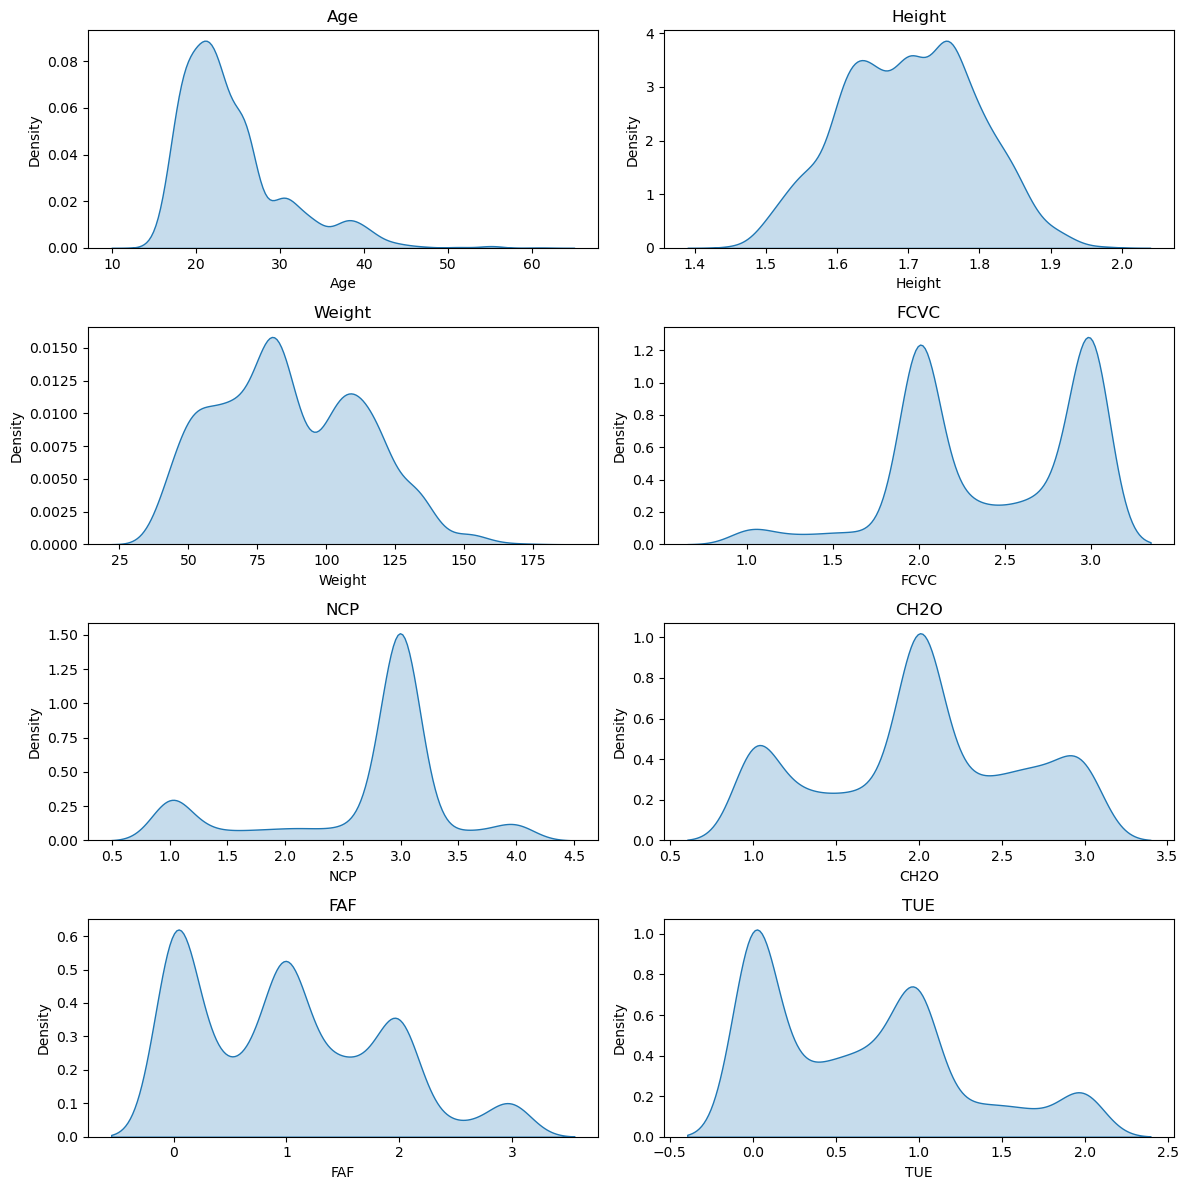

In [11]:
# kernel density plots for all numeric features
n = len(numeric_features)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_features):
    sns.kdeplot(data[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_ylabel('Density')

# remove unused axes (if any)
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

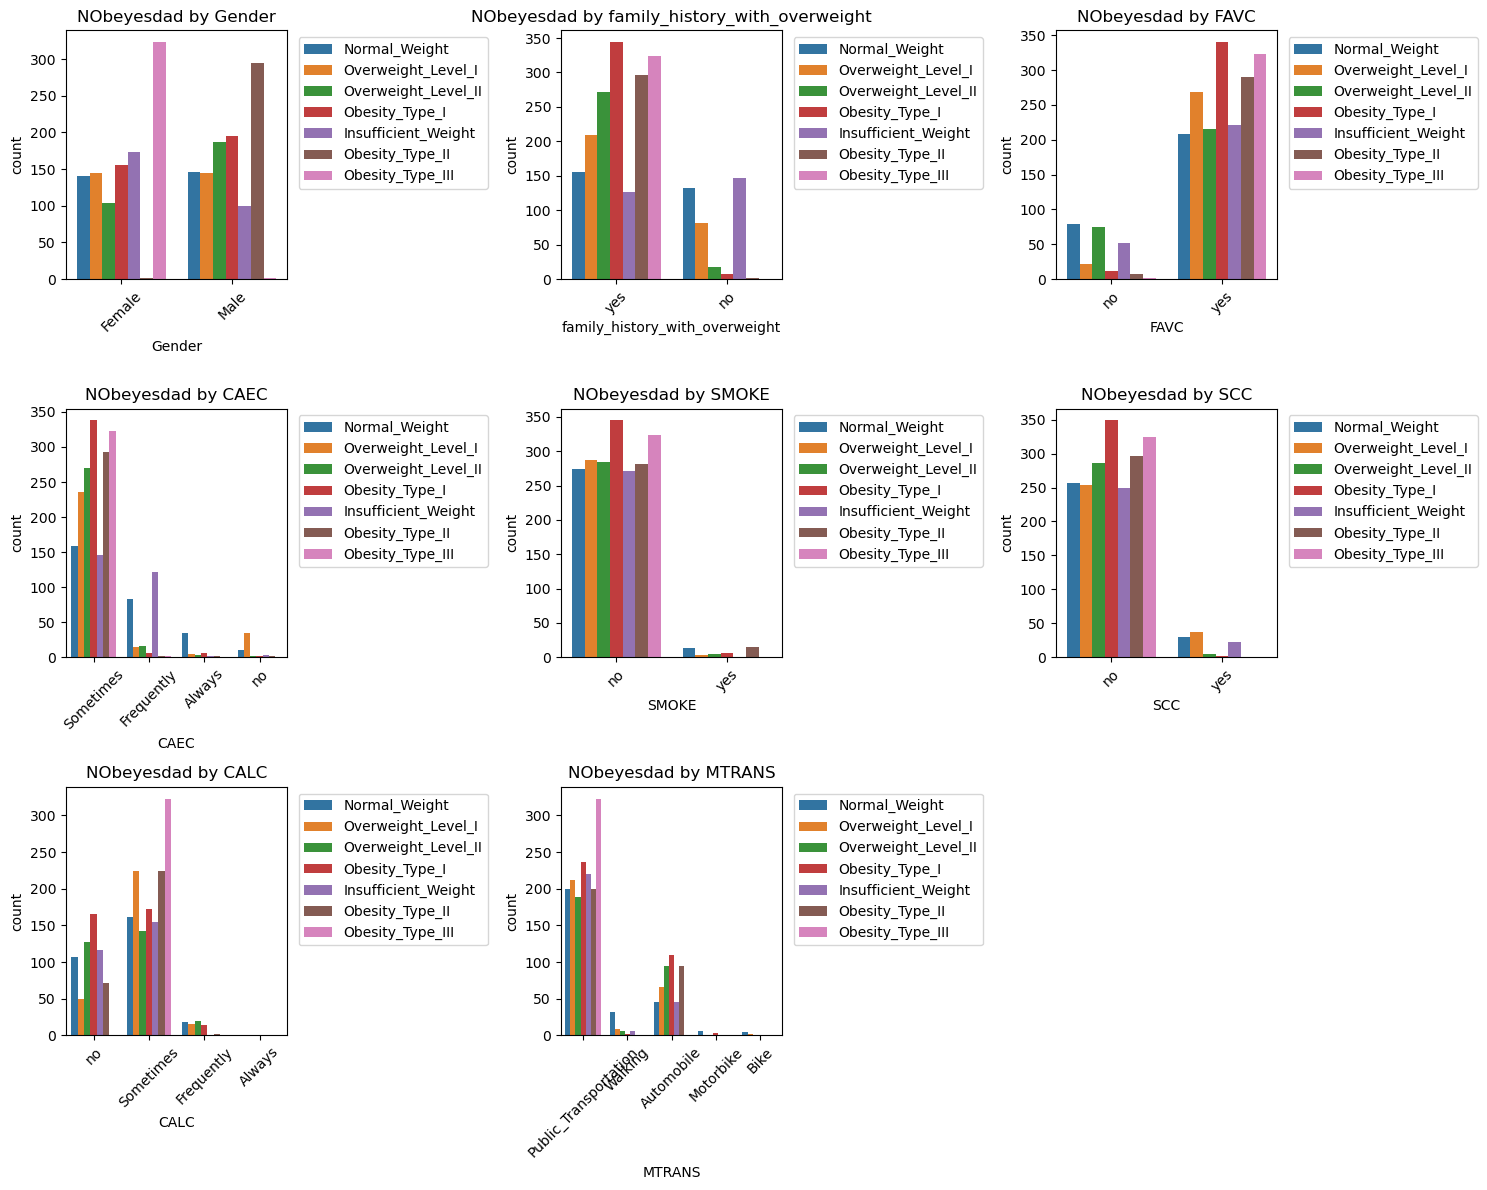

In [12]:
# plot NObeyesdad distribution stratified by each categorical variable
cats = [c for c in categorical_features if c != 'NObeyesdad']
n_plots = len(cats)
ncols = 3
nrows = int(np.ceil(n_plots / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

for ax, col in zip(axs, cats):
    sns.countplot(data=data, x=col, hue='NObeyesdad', ax=ax)
    ax.set_title(f'NObeyesdad by {col}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

for ax in axs[len(cats):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

All the categorical varibles seem to have significant effect on the output class. So we will include all of them for training the models

## Data Split

In [ ]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# X_train, X_val, y_train, y_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(X_train.shape)
# print(X_train.shape)
print(X_test.shape)

(1688, 16)
(423, 16)


In [58]:
pd.concat([X_test,y_test],axis= 1).to_csv('../data/obesity_test_data.csv',index=False)

## Model Building

In [14]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                        'SMOKE', 'SCC', 'CALC', 'MTRANS']

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline   
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


### Pre-processing pipelines

In [16]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [40]:
preprocessor_scaling = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor_no_scaling = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# print parameter search results for every iteration
def print_search_results(gs, name="GridSearch"):
    cvres = pd.DataFrame(gs.cv_results_)
    # collect split test score columns if present
    split_cols = [c for c in cvres.columns if c.startswith('split') and c.endswith('_test_score')]
    cols = split_cols + ['mean_test_score', 'std_test_score', 'rank_test_score', 'params', 'mean_fit_time', 'mean_score_time']
    # print(f"\n===== Results for {name} (sorted by rank_test_score) =====")
    display(cvres[cols].sort_trainues('rank_test_score').reset_index(drop=True))
    # print("\nDetailed iterations (in original iteration order):")
    for i, r in cvres.iterrows():
        split_scores = {c: r[c] for c in split_cols}
        # print(f"Iter {i+1:03d} | rank={int(r['rank_test_score'])} | mean={r['mean_test_score']:.4f} ±{r['std_test_score']:.4f} | params={r['params']} | splits={split_scores}")


### Logistic regression

In [19]:


#Defining the model
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=5000,
    penalty='l2'
)

pipe_lg = Pipeline(steps=[
    ('preprocessor', preprocessor_scaling),
    ('classifier', log_reg)
])

param_grid_lg = {
    'classifier__C':[0.01, 0.1, 1, 10]
}

In [20]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipe_lg,
    param_grid_lg,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal a

[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ....................................classifier__C=1; total time=   0.0s
[CV] END ....................................classifier__C=1; total time=   0.0s
[CV] END ...................

/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/b

,estimator,Pipeline(step...ltinomial'))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [23]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print("Training Set Performance:")
y_train_pred = grid_search.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'C

In [24]:
# crossvalidation results
print_search_results(grid_search, name="Logistic Regression (grid_search)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.946904,0.910419,0.946413,0.955317,0.928396,0.937490,0.016134,1,{'classifier__C': 10},0.055920,0.003325
1,0.893839,0.848234,0.861484,0.872443,0.876865,0.870573,0.015271,2,{'classifier__C': 1},0.036501,0.004186
2,0.772286,0.749565,0.748030,0.755055,0.759069,0.756801,0.008686,3,{'classifier__C': 0.1},0.031675,0.004744
3,0.665360,0.601809,0.572717,0.628907,0.653527,0.624464,0.033846,4,{'classifier__C': 0.01},0.019120,0.006507


In [25]:
# print(grid_search.best_estimator_)
with open("best_logistic_regression_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)

### KNN

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

pipe_knn = Pipeline(steps = [
    ('preprocessor', preprocessor_scaling),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3,5,7,9,15,20,25,30],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    pipe_knn,
    param_grid_knn,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=2, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_nei

/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = 

[CV] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=15, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=20, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=15, classifier__p=2, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=15, classifier__p=2, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=20, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=15, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=9, classifier__p=2, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=15, classifier__p=2, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=20, classifier__p=1, classifier__weights=unifo

/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = 

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__n_neighbors': [3, 5, ...], 'classifier__p': [1, 2], 'classifier__weights': ['uniform', 'distance']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [32]:
print(grid_search_knn.best_estimator_)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)
print("Training Set Performance:")
y_train_pred = grid_search_knn.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'C

In [33]:

# call for both searches (they should already be fit)
print_search_results(grid_search_knn, name="KNN (grid_search_knn)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.890290,0.882000,0.847631,0.885838,0.890093,0.879171,0.016063,1,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.008635,0.013186
1,0.879959,0.870359,0.850611,0.858278,0.884014,0.868644,0.012648,2,"{'classifier__n_neighbors': 5, 'classifier__p'...",0.006056,0.011778
2,0.877354,0.849291,0.838396,0.863582,0.871724,0.860069,0.014373,3,"{'classifier__n_neighbors': 7, 'classifier__p'...",0.005025,0.010174
3,0.874717,0.848498,0.825933,0.863078,0.861491,0.854743,0.016631,4,"{'classifier__n_neighbors': 9, 'classifier__p'...",0.006393,0.013305
4,0.854630,0.826495,0.820161,0.857722,0.861898,0.844181,0.017299,5,"{'classifier__n_neighbors': 15, 'classifier__p...",0.005831,0.023504
5,0.879512,0.828969,0.816670,0.843706,0.839683,0.841708,0.021102,6,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.005654,0.006990
6,0.860669,0.812546,0.822290,0.834077,0.844695,0.834855,0.016849,7,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.005857,0.006127
7,0.858611,0.828445,0.799941,0.843474,0.831637,0.832422,0.019388,8,"{'classifier__n_neighbors': 5, 'classifier__p'...",0.005797,0.005592
8,0.845266,0.812000,0.795586,0.828541,0.847945,0.825868,0.019901,9,"{'classifier__n_neighbors': 20, 'classifier__p...",0.016179,0.020400
9,0.812884,0.823596,0.810757,0.809340,0.836049,0.818525,0.010093,10,"{'classifier__n_neighbors': 25, 'classifier__p...",0.006551,0.013694


In [34]:
# print(grid_search.best_estimator_)
with open("best_knn_model.pkl", "wb") as f:
    pickle.dump(grid_search_knn.best_estimator_, f)

### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

pipe_gnb = Pipeline(steps = [
    ('preprocessor', preprocessor_scaling),
    ('classifier', GaussianNB())
])

# pipe_gnb.fit(X_train, y_train)

param_grid_gnb = {
    'classifier__var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-7]
}

grid_search_gnb = GridSearchCV(
    pipe_gnb,
    param_grid_gnb,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_gnb.fit(X_train, y_train)

print(grid_search_gnb.best_estimator_)
print(grid_search_gnb.best_params_)
print(grid_search_gnb.best_score_)

print("Validation Set Performance:")
y_train_pred = grid_search_gnb.predict(X_train)
print(classification_report(y_train, y_train_pred))

# crossvalidation results
print_search_results(grid_search_gnb, name="GaussianNB (grid_search_gnb)")

with open("best_gaussian_nb_model.pkl", "wb") as f:
    pickle.dump(grid_search_gnb.best_estimator_, f)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoo

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.455983,0.428500,0.461055,0.483980,0.467942,0.459492,0.018146,1,{'classifier__var_smoothing': 1e-07},0.005215,0.002861
1,0.446268,0.430353,0.455621,0.457395,0.467051,0.451338,0.012393,2,{'classifier__var_smoothing': 1e-08},0.005864,0.002991
2,0.440355,0.428104,0.453776,0.447607,0.464966,0.446962,0.012412,3,{'classifier__var_smoothing': 1e-09},0.005573,0.003635
3,0.435603,0.424272,0.427872,0.442417,0.450718,0.436176,0.009606,4,{'classifier__var_smoothing': 1e-10},0.005140,0.003245
4,0.380484,0.413195,0.410948,0.432500,0.424964,0.412418,0.017795,5,{'classifier__var_smoothing': 1e-12},0.005878,0.004170


The naive Bayes model is performing very poorly as multiple assumptions are broken:
1. GaussianNB expects continuous data: the data type is mixed,
2. GaussianNB expects all features to be normally distributed, but as we saw in the initial EDA, a lot of the numeric features are not normal.



### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_dt.fit(X_train, y_train)

print(grid_search_dt.best_estimator_)
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

print("Training Set Performance:")
y_train_pred = grid_search_dt.predict(X_train)
print(classification_report(y_train, y_train_pred))

print_search_results(grid_search_dt, name="Decision Tree (grid_search_dt)")

with open("best_decision_tree_model.pkl", "wb") as f:
    pickle.dump(grid_search_dt.best_estimator_, f)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal a

[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifie

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.615542,0.550836,0.545204,0.597418,0.622941,0.586388,0.032459,1,"{'classifier__criterion': 'entropy', 'classifi...",0.005323,0.004893
1,0.609993,0.539861,0.549881,0.605701,0.624126,0.585912,0.034207,2,"{'classifier__criterion': 'gini', 'classifier_...",0.005166,0.003007
2,0.609385,0.543336,0.545089,0.597248,0.619676,0.582947,0.032419,3,"{'classifier__criterion': 'entropy', 'classifi...",0.005817,0.003257
3,0.609385,0.543336,0.545089,0.597248,0.619676,0.582947,0.032419,3,"{'classifier__criterion': 'entropy', 'classifi...",0.003667,0.002079
4,0.609385,0.543336,0.545089,0.597248,0.619676,0.582947,0.032419,3,"{'classifier__criterion': 'entropy', 'classifi...",0.005650,0.002750
...,...,...,...,...,...,...,...,...,...,...,...
85,0.546013,0.485409,0.500093,0.523952,0.538149,0.518723,0.022831,85,"{'classifier__criterion': 'gini', 'classifier_...",0.004457,0.002600
86,0.546013,0.485409,0.500093,0.523952,0.538149,0.518723,0.022831,85,"{'classifier__criterion': 'gini', 'classifier_...",0.004859,0.002604
87,0.524500,0.482814,0.498502,0.527821,0.559145,0.518556,0.026261,88,"{'classifier__criterion': 'entropy', 'classifi...",0.005144,0.003387
88,0.524500,0.482814,0.498502,0.527821,0.559145,0.518556,0.026261,88,"{'classifier__criterion': 'entropy', 'classifi...",0.006025,0.003448


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_dep

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__max_features': ['sqrt', 'log2'], 'classifier__min_samples_leaf': [1, 2], 'classifier__min_samples_split': [2, 5], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...)]"


In [73]:
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

print("Training Set Performance:")
y_train_pred = grid_search_rf.predict(X_train)
print(classification_report(y_train, y_train_pred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        n_estimators=200, random_state=42))])
{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
0.5938369319116

In [74]:
print_search_results(grid_search_rf, name="Random Forest (grid_search_rf)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.622447,0.561088,0.559540,0.596603,0.629507,0.593837,0.029487,1,"{'classifier__max_depth': 10, 'classifier__max...",0.140915,0.010878
1,0.622447,0.561088,0.559540,0.596603,0.629507,0.593837,0.029487,1,"{'classifier__max_depth': 10, 'classifier__max...",0.150045,0.009594
2,0.619698,0.564229,0.551976,0.596603,0.635481,0.593597,0.031747,3,"{'classifier__max_depth': 10, 'classifier__max...",0.079623,0.006253
3,0.619698,0.564229,0.551976,0.596603,0.635481,0.593597,0.031747,3,"{'classifier__max_depth': 10, 'classifier__max...",0.090328,0.008683
4,0.607220,0.567901,0.560907,0.589166,0.636868,0.592412,0.027566,5,"{'classifier__max_depth': 10, 'classifier__max...",0.077788,0.007144
...,...,...,...,...,...,...,...,...,...,...,...
59,0.610465,0.553222,0.554923,0.593750,0.627440,0.587960,0.029654,59,"{'classifier__max_depth': 20, 'classifier__max...",0.084133,0.006377
60,0.610465,0.553222,0.554923,0.593750,0.627440,0.587960,0.029654,59,"{'classifier__max_depth': None, 'classifier__m...",0.080494,0.006821
61,0.610465,0.553222,0.554923,0.593750,0.627440,0.587960,0.029654,59,"{'classifier__max_depth': None, 'classifier__m...",0.077913,0.006501
62,0.610465,0.553222,0.554923,0.593750,0.627440,0.587960,0.029654,59,"{'classifier__max_depth': 30, 'classifier__max...",0.081854,0.009861


In [75]:
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(grid_search_rf.best_estimator_, f)

### XGBoost

In [76]:
from xgboost import XGBClassifier

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [78]:
label_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [91]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [79]:
y_train_encoded = label_encoder.transform(y_train)

In [80]:
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        num_class=7,   # must match your dataset
        eval_metric='mlogloss',
        random_state=42
    ))
])
param_grid_xgb = {
    'classifier__n_estimators': [100, 150,200],
    'classifier__max_depth': [3, 6, 10, 15],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    pipe_xgb,
    param_grid_xgb,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train_encoded)

print(grid_search_xgb.best_estimator_)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

print("Training Set Performance:")
y_train_pred = grid_search_xgb.predict(X_train)
print(classification_report(y_train_encoded, y_train_pred))



Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__lea

XGBoost showed lower-than-expected performance. This may be attributed to substantial overlap between neighboring obesity categories, which represent gradual physiological transitions rather than sharply separable classes. Such structure resembles an ordinal classification problem, whereas the model treats classes as nominal.


In [81]:
print_search_results(grid_search_xgb, name="XGBoost (grid_search_xgb)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.600800,0.561080,0.572214,0.593984,0.629211,0.591458,0.023715,1,"{'classifier__colsample_bytree': 0.8, 'classif...",0.111349,0.005202
1,0.600658,0.563103,0.564789,0.601834,0.623480,0.590773,0.023369,2,"{'classifier__colsample_bytree': 0.8, 'classif...",0.119819,0.005924
2,0.600573,0.558145,0.564654,0.601616,0.626367,0.590271,0.025401,3,"{'classifier__colsample_bytree': 0.8, 'classif...",0.140083,0.005795
3,0.606786,0.558337,0.567576,0.591439,0.624358,0.589699,0.024369,4,"{'classifier__colsample_bytree': 0.8, 'classif...",0.126360,0.009808
4,0.598031,0.561080,0.567581,0.593984,0.626300,0.589395,0.023389,5,"{'classifier__colsample_bytree': 1.0, 'classif...",0.113233,0.006735
...,...,...,...,...,...,...,...,...,...,...,...
91,0.527105,0.483094,0.535103,0.544077,0.538357,0.525547,0.021925,92,"{'classifier__colsample_bytree': 0.8, 'classif...",0.101757,0.004831
92,0.534448,0.478805,0.506615,0.506057,0.550485,0.515282,0.024889,93,"{'classifier__colsample_bytree': 1.0, 'classif...",0.077230,0.006487
93,0.487970,0.497257,0.507660,0.511378,0.551493,0.511152,0.021772,94,"{'classifier__colsample_bytree': 0.8, 'classif...",0.062734,0.003025
94,0.481445,0.512249,0.485845,0.503302,0.551369,0.506842,0.024941,95,"{'classifier__colsample_bytree': 1.0, 'classif...",0.079728,0.004611


In [ ]:
mcc = matthews_corrcoef(y_train_encoded, y_train_pred)
print("MCC:", mcc)

MCC: 0.5833169608006662


In [ ]:
y_proba = grid_search_xgb.predict_proba(X_train)
auc = roc_auc_score(
    y_train_encoded,
    y_proba,              # predicted probabilities
    multi_class='ovr',    # or 'ovo'
    average='weighted'    # macro / weighted
)

print("AUC:", auc)

AUC: 0.8942495539864993


In [82]:
with open("best_xgboost_model.pkl", "wb") as f:
    pickle.dump(grid_search_xgb.best_estimator_, f)